# 1. Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Import completed.")

Import completed.


# 2. Load Data

In [2]:
# Set the path to the dataset
file_path = "../datasets/WELFake_Dataset.csv"

df = pd.read_csv(file_path)
df = df.dropna(subset=["title", "text", "label"])
df["title"] = df["title"].astype(str)
df["text"] = df["text"].astype(str)
df["label"] = df["label"].astype(int)

sample_frac = 1
# sample_frac = 0.5 # Faster training
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Train-test split
split_idx = int(0.8 * len(df))
train_data = df[:split_idx]
test_data = df[split_idx:]

# 3. Build and Train Linear Regression Classifier

In [3]:
# Build the model
model = make_pipeline(TfidfVectorizer(), SGDClassifier(loss='log_loss', random_state=42))

# Train the model
model.fit(train_data['title'], train_data['label'])

# Predict test data
predicted_categories = model.predict(test_data['title'])

# 4. Compute and Display Metrics

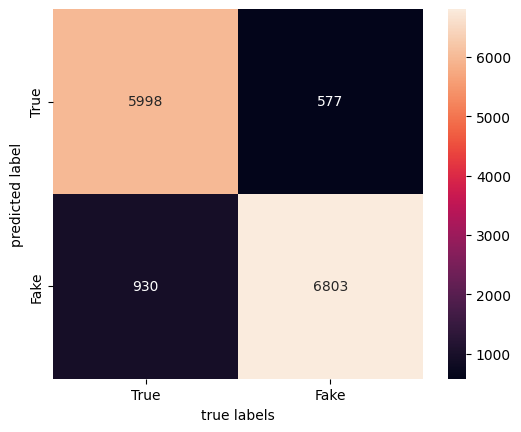

Accuracy: 0.8946743080793962
              precision    recall  f1-score   support

        True       0.91      0.87      0.89      6928
        Fake       0.88      0.92      0.90      7380

    accuracy                           0.89     14308
   macro avg       0.90      0.89      0.89     14308
weighted avg       0.90      0.89      0.89     14308



In [9]:
matrix = confusion_matrix(test_data['label'], predicted_categories)

labels = sorted(df['label'].unique())

sns.heatmap(matrix.T,
            square = True,
            annot=True,
            fmt = "d",
            xticklabels = ["True", "Fake"],
            yticklabels = ["True", "Fake"])

plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

print("Accuracy: {}".format(accuracy_score(test_data['label'], predicted_categories)))

print(classification_report(test_data['label'], predicted_categories, target_names=["True", "Fake"]))

# 5. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = make_pipeline(
    TfidfVectorizer(),
    SGDClassifier(loss='log_loss', random_state=42)
)

# Define hyperparameters to tune
param_grid = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'tfidfvectorizer__stop_words': [None, 'english'],
    'tfidfvectorizer__max_df': [0.8, 1.0],
    'tfidfvectorizer__min_df': [1, 2],
    'sgdclassifier__alpha': [1e-4, 1e-3, 1e-2],
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],
    'sgdclassifier__max_iter': [1000],
    'sgdclassifier__tol': [1e-3]
}

# Run grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit on training data
grid_search.fit(train_data['title'], train_data['label'])

# Print the best results
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))
print("Best parameters:", grid_search.best_params_)

# Use best model to predict on test data
best_model = grid_search.best_estimator_
predicted_categories = best_model.predict(test_data['title'])

# Evaluate
print("Test Accuracy: {:.4f}".format(accuracy_score(test_data['label'], predicted_categories)))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best cross-validation accuracy: 0.8959
Best parameters: {'sgdclassifier__alpha': 0.0001, 'sgdclassifier__max_iter': 1000, 'sgdclassifier__penalty': 'l2', 'sgdclassifier__tol': 0.001, 'tfidfvectorizer__max_df': 0.8, 'tfidfvectorizer__min_df': 2, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__stop_words': None}
Test Accuracy: 0.8947
